# 지도학습
- 입력과 출력 샘플 데이터가 있고 주어진 입력으로부터 출력을 예측
- 훈련 세트로부터 머신러닝 모델을 만듬

## 분류와 회귀
- 분류 : 여러 클래스 레이블 중 하나를 예측
    - 이진 분류 : 두 개의 클래스로 분류
        - 한 클래스를 양성(학습하고자 하는 대상), 다른 하나를 음성 클래스라고도 함
    - 다중 분류 : 여러 개의클래스로 분류
- 회귀 : 연속적인 숫자, 부동소수점수를 예측
- 출력 값에 연속성이 있으면 회귀 연속성이 없으면 분류

## 일반화, 과대적합, 과소적합
- 일반화(generalization) : 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같아 처음 보는 데이터가 주어져도 정확히 예측가능한 것
- 과대적합(overfitting) : 가진 정보를 모두 사용해 너무 복잡한 모델을 만드는 것
- 과소적합(underfitting) : 너무 간단한 모델이 선택되는 것

## 모델 복잡도와 데이터셋 크기의 관계
- 모델 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음



X.shape : (26, 2)


C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


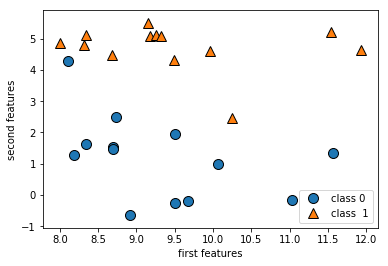

In [5]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class  1"], loc = 4)
plt.xlabel("first features")
plt.ylabel("second features")
print("X.shape : {}".format(X.shape))

Text(0, 0.5, 'target')

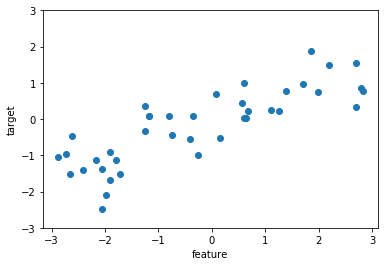

In [21]:
# 0~40의 값을 인위적으로 만듬
X, y = mglearn.datasets.make_wave(n_samples= 40)
plt.plot(X, y , 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

## 지도 학습 알고리즘
- k - 최근접 이웃 : k - Nearest Negithbors 

### data set

#### 유방암 data set
- np.bincount : 음수가 아닌 각 값의 발생횟수 count
- zip : 인자들을 zip형태로 묶어줌 (iter 형태)

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 :  {}".format(cancer.data.shape))
cancer_class_dict = {n : v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}
print("클래스 별 샘플 개수 :  {}".format(cancer_class_dict))
print("특성 이름 : \n{}".format(cancer.feature_names))

cancer.keys() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 :  (569, 30)
클래스 별 샘플 개수 :  {'malignant': 212, 'benign': 357}
특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 보스턴 주택가격 data set

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : {}".format(boston.data.shape))
X, y=  mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

데이터의 형태 : (506, 13)
X.shape : (506, 104)


### k - 최근접 이웃 
- k-NN : k - Nearest Neighbors
- 가장 가까운 훈련 데이터 포인트로 하나의 최근접 이웃을 찾아 예측에 사용

C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


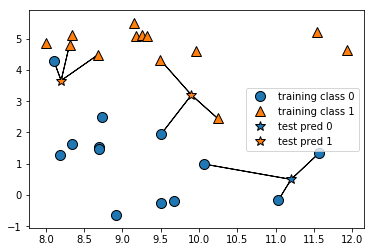

In [46]:
# forge 데이터셋애 대한 최근접 이웃
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train , X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = KNeighborsClassifier(n_neighbors=3)

C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
# X_train과 y_train으로 학습 시키고
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
print("테스트 세트 예측 : {}".format(clf.predict(X_test)))
print("정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
정확도 : 0.86


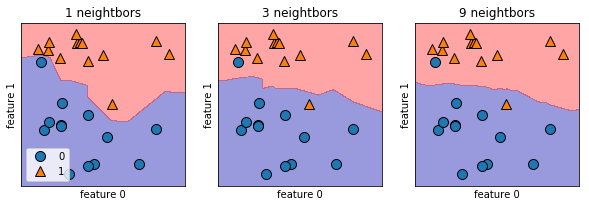

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neightbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

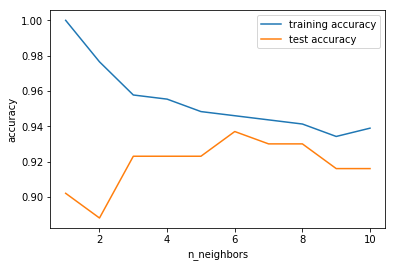

In [58]:
# n_neighbors 에 대한 정확도
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train ,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 neighbors
neighbors_setting = range(1, 11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train ,y_train))    
    test_accuracy.append(clf.score(X_test ,y_test))

plt.plot(neighbors_setting, training_accuracy, label = "training accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "test accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
# 최적점을 잘 찾아줘야 함

### k-최근접 이웃 회귀

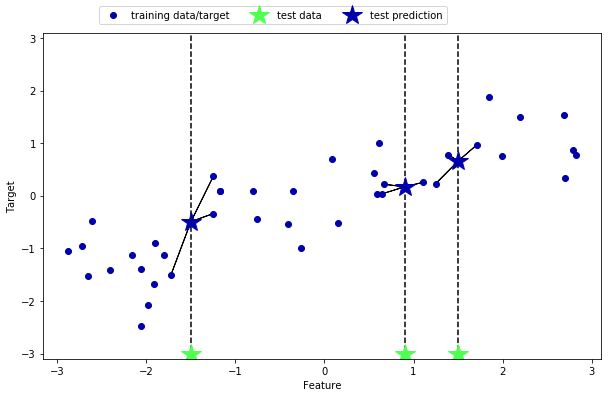

In [60]:
mglearn.plots.plot_knn_regression(n_neighbors=3)